In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rnd
import os
import warnings
import joblib
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from operator import add
import pickle
MEDIUM_SIZE = 10
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12
import sys
sys.path.append("C:/")
dir = 'C:/Users/rahmata/'

%matplotlib inline
warnings.filterwarnings('ignore')


In [69]:
df = pd.read_csv(os.path.join(dir, 'heart.csv'))
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [70]:
print(df.info())
missing_values = (df.isnull().sum() / len(df)) * 100
print("\nFeatures with missing values: \n", missing_values[missing_values > 0])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None

Features with missing values: 
 Series([], dtype: float64)


In [71]:
print(np.char.center(" Unique values of categorical variables ", 60, fillchar = "*"))
print("\nSex: ", df.sex.unique())
print("Cp: ", sorted(df.cp.unique()))
print("fbs: ", sorted(df.fbs.unique()))
print("restecg: ", sorted(df.restecg.unique()))
print("exang: ", sorted(df.exang.unique()))
print("slope: ", sorted(df.slope.unique()))
print("ca: ", sorted(df.ca.unique()))
print("thal: ", sorted(df.thal.unique()))
print("target: ", sorted(df.target.unique()))

********** Unique values of categorical variables **********

Sex:  [1 0]
Cp:  [0, 1, 2, 3]
fbs:  [0, 1]
restecg:  [0, 1, 2]
exang:  [0, 1]
slope:  [0, 1, 2]
ca:  [0, 1, 2, 3, 4]
thal:  [0, 1, 2, 3]
target:  [0, 1]


In [72]:
def draw_semi_pie_chart(data, column, fig, renamed_index_dict, title):
    default_colors = ['#66b3ff', '#ff9999', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#ff6666']
    rnd.shuffle(default_colors)
    ax = df[column].value_counts().rename(index = renamed_index_dict).plot.pie(colors = default_colors, autopct='%1.1f%%', startangle=90, title = title)
    ax.set_ylabel('')
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(20)
        
    centre_circle = plt.Circle((0,0), 0.70, fc='white')
    fig.gca().add_artist(centre_circle)

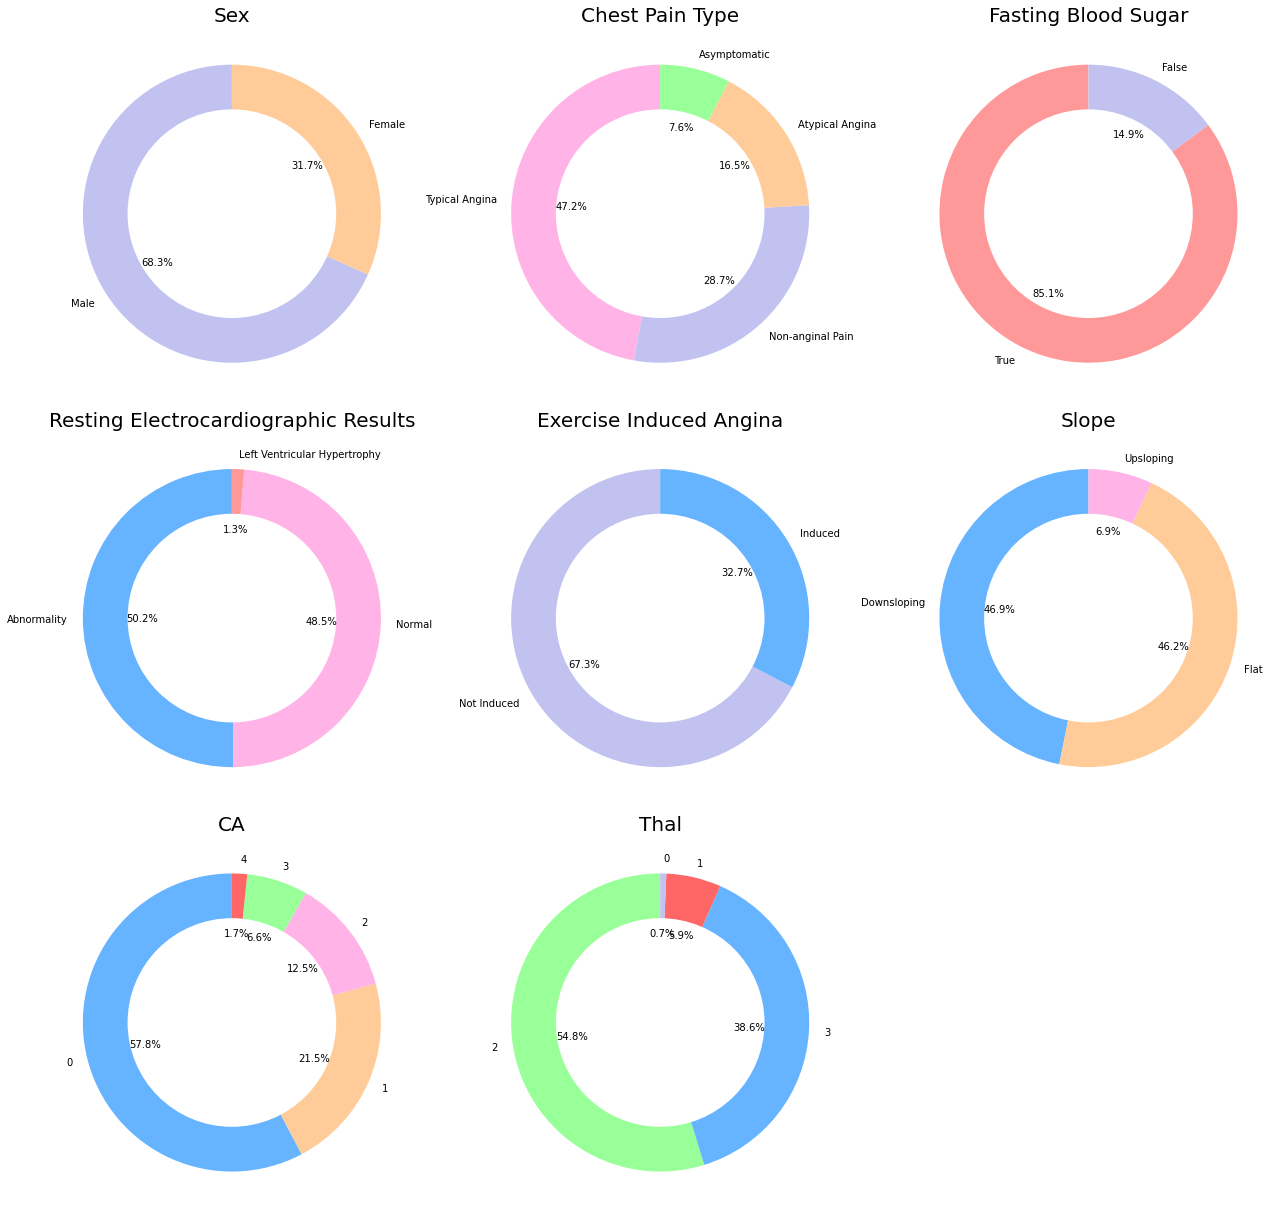

In [73]:
fig = plt.gcf()
fig.set_size_inches(18, 17)
grid_rows = 3
grid_cols = 3

# Draw Sex Pie chart
plt.subplot(grid_rows, grid_cols, 1)
draw_semi_pie_chart(df, 'sex', fig, {0: 'Female', 1: 'Male'}, 'Sex')

# Draw Chest pain type chart
plt.subplot(grid_rows, grid_cols, 2)
draw_semi_pie_chart(df, 'cp', fig, {0:'Typical Angina', 1:'Atypical Angina', 2:'Non-anginal Pain',3:'Asymptomatic'}, 'Chest Pain Type')

# Draw Fasting blood sugar chart
plt.subplot(grid_rows, grid_cols, 3)
draw_semi_pie_chart(df, 'fbs', fig, {0:'True', 1:'False'}, 'Fasting Blood Sugar')

# Draw restecg - resting electrocardiographic results
plt.subplot(grid_rows, grid_cols, 4)
draw_semi_pie_chart(df, 'restecg', fig, {0:'Normal', 1:'Abnormality', 2:'Left Ventricular Hypertrophy'}, 'Resting Electrocardiographic Results')

# Draw exang - exercise induced angina
plt.subplot(grid_rows, grid_cols, 5)
draw_semi_pie_chart(df, 'exang', fig, {0:'Not Induced', 1:'Induced'}, 'Exercise Induced Angina')

# Draw exang - exercise induced angina
plt.subplot(grid_rows, grid_cols, 6)
draw_semi_pie_chart(df, 'slope', fig, {0:'Upsloping', 1:'Flat', 2:'Downsloping'}, 'Slope')

# Draw ca
plt.subplot(grid_rows, grid_cols, 7)
draw_semi_pie_chart(df, 'ca', fig, {0:'0', 1:'1', 2:'2', 3:'3', 4:'4'}, 'CA')

# Draw thal
plt.subplot(grid_rows, grid_cols, 8)
draw_semi_pie_chart(df, 'thal', fig, {0:'0', 1:'1', 2:'2', 3:'3'}, 'Thal')

fig.tight_layout()
plt.show()

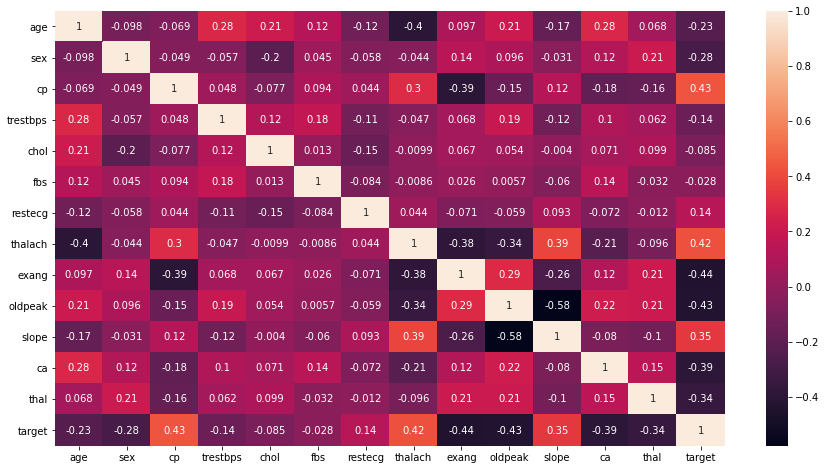

In [74]:
fig = plt.gcf()
fig.set_size_inches(15, 8)
sns.heatmap(df.corr(), annot = True)
plt.show()

In [75]:
features = ['age','cp', 'slope', 'thal', 'restecg']
x = pd.get_dummies(df.drop(['target'], axis = 1), columns = features, drop_first=True).values
y = df.target.values

In [76]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [77]:
from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [78]:
# SVM
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(x_train, y_train)
y_pred_svm = classifier.predict(x_test)

In [79]:
# print("SVM Confusion Matrix")
# cm = confusion_matrix(y_test, y_pred_svm)
# print(cm)

print("Confusion Matrix : \n\n" , confusion_matrix(y_pred_svm,y_test))
print("Classification Report : \n\n" , classification_report(y_pred_svm,y_test),"\n")


Confusion Matrix : 

 [[24  7]
 [ 3 27]]
Classification Report : 

               precision    recall  f1-score   support

           0       0.89      0.77      0.83        31
           1       0.79      0.90      0.84        30

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61
 



In [80]:
objects_to_dump = {
        'features': features,
        'scaler': scaler,
        'estimator': classifier
        }
joblib.dump(objects_to_dump, os.path.join(dir, 'heart_predict.pkl'))

['C:/Users/rahmata/heart_predict.pkl']

In [40]:
pickle.dump(classifier, open('model.pkl', 'wb'))
pickle.dump(sc, open('scaler.pkl', 'wb'))

model = pickle.load(open('model.pkl', 'rb'))
print(model)

SVC(kernel='linear', random_state=0)


In [14]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier, x_train, y_train, cv = 10)
print("Scores: ", scores)
print("Accuracy: ", round(scores.mean(), 2) * 100, "%")
print("Standard Deviation: +/-", scores.std())

Scores:  [0.68       0.8        0.83333333 0.75       0.91666667 0.75
 0.79166667 0.75       0.75       0.875     ]
Accuracy:  79.0 %
Standard Deviation: +/- 0.06614294285023072


In [15]:
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = classifier, param_grid = parameters, scoring = 'accuracy', cv = 10, n_jobs = -1)
grid_search = grid_search.fit(x_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_


In [16]:
print(grid_search.cv_results_)
print(grid_search.best_estimator_)
print(grid_search.best_score_)
print(grid_search.best_params_)


{'mean_fit_time': array([6.24895096e-03, 2.43848085e-02, 2.30750155e-01, 2.69600534e+00,
       3.01768780e-03, 5.39958477e-03, 4.08389568e-03, 3.35245132e-03,
       4.67853546e-03, 3.53214741e-03, 2.62305737e-03, 3.42590809e-03,
       1.81789398e-03, 3.42886448e-03, 5.64508438e-03, 4.83961105e-03,
       4.23653126e-03, 5.03890514e-03, 3.22160721e-03, 5.22470474e-03,
       4.11500931e-03, 4.49926853e-03, 4.19938564e-03, 5.50007820e-03,
       4.19943333e-03, 4.09903526e-03, 4.19914722e-03, 4.22430038e-03,
       4.12638187e-03, 4.84514236e-03, 4.24072742e-03, 4.11345959e-03,
       4.16741371e-03, 4.17344570e-03, 3.48570347e-03, 5.23386002e-03,
       5.03594875e-03, 4.83045578e-03, 4.43496704e-03, 4.83057499e-03]), 'std_fit_time': array([7.65337102e-03, 1.25087896e-02, 6.95537752e-02, 1.31577091e+00,
       4.24361767e-03, 3.79959912e-03, 8.48076703e-06, 2.87269681e-03,
       4.01552868e-03, 3.77738927e-03, 3.82894150e-03, 4.02903277e-03,
       2.90838481e-03, 4.42105411e-03, 3.

In [18]:
best_dt_estimator = grid_search.best_estimator_
print(best_dt_estimator.score(x_train, y_train))

0.8760330578512396


In [ ]:
objects_to_dump = { 
        'imputable-features': imputable_cont_features,
        'cont-features': features,
        'cat-features':ohe_features,
        'cont-imputer':cont_imputer,
        'cat-imputer':cat_imputer,
        'family-size-func':convert_familysize,
        'le-sex':lab_encoder_sex,
        'le-emb':lab_encoder_emb,
        'le-pclass':lab_encoder_pclass,
        'le-fgroup':lab_encoder_fgroup,
        'ohe':ohe,
        'estimator':best_dt_estimator
        }